# Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)



In [ ]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg'.split())



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10,10)


First, read the image as grayscale



Text(0.5, 1.0, 'Original image')

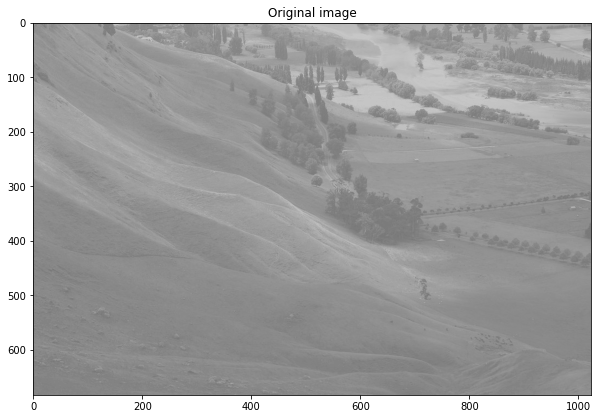

In [ ]:
# read as grayscale
I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg",0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")


Let's start by calculating and showing the original histogram


In [ ]:
bins_edges_min_max = [0,256]
num_bins=256
bin_count,bins_edges = np.histogram(I,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]


Text(0.5, 1.0, 'Original histogram')

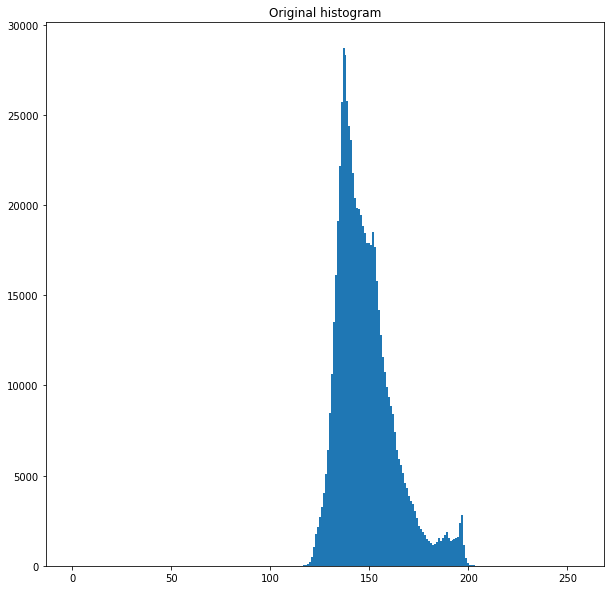

In [ ]:
def draw_hist(x_axis,input):
    fig,ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0]/(x_axis[-1]-x_axis[0]+1))
    return fig,ax

draw_hist(bins_start,bin_count)
plt.title("Original histogram")



Normalize the histogram to gat a discrete PDF


Text(0.5, 1.0, 'Original PDF')

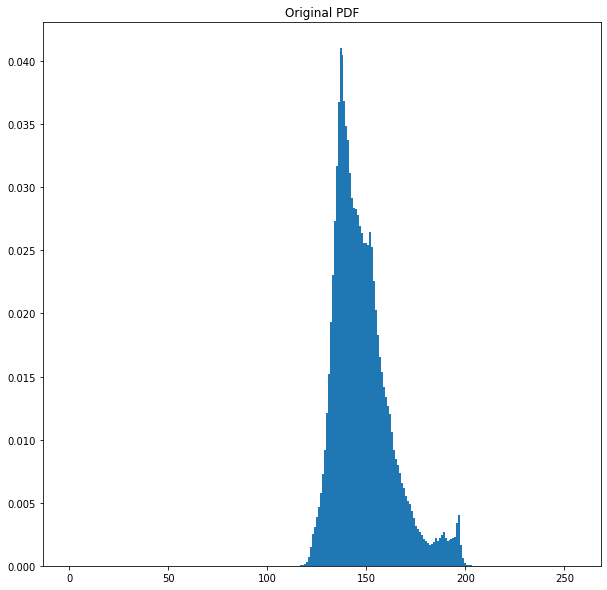

In [ ]:
pdf = bin_count/np.sum(bin_count)

draw_hist(bins_start,pdf)
plt.title("Original PDF")



Get the CDF by calculating the cumulative sum of the pdf data


Text(0.5, 1.0, 'Original CDF')

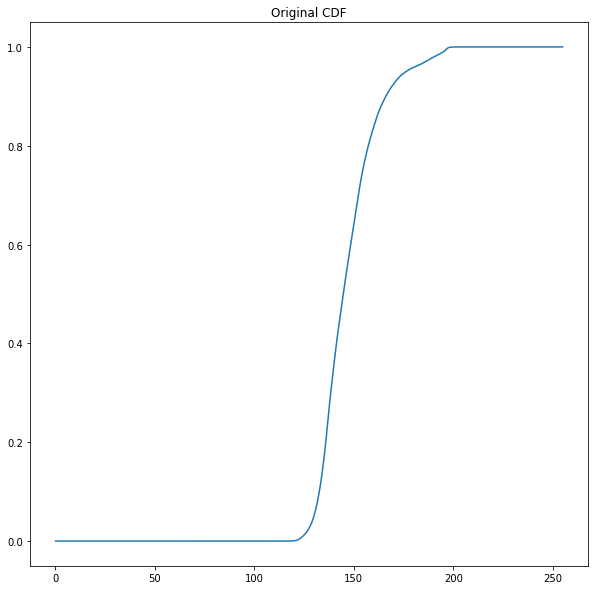

In [ ]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")



Text(0.5, 1.0, 'Original PDF+ const*CDF to show the connection between the two')

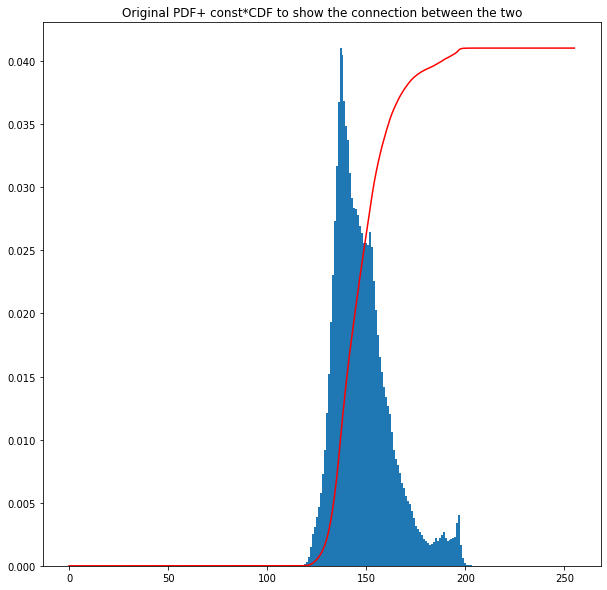

In [ ]:
fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("Original PDF+ const*CDF to show the connection between the two")



The final step is to un-normalize the CDF to become the equalization function


In [ ]:
f_eq = np.round(cdf*255).astype(int)

f_eq


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   6,   8,  10,
        13,  17,  22,  28,  35,  43,  52,  63,  73,  82,  91, 100, 108,
       115, 122, 130, 137, 144, 150, 157, 163, 170, 177, 183, 189, 194,
       199, 203, 207, 210, 214, 217, 220, 223, 225, 227, 229, 231, 233,
       235, 236, 237, 238, 240, 241, 241, 242, 243, 243, 244, 24

Use the equalization function to get the equalized image


Text(0.5, 1.0, 'equalized image')

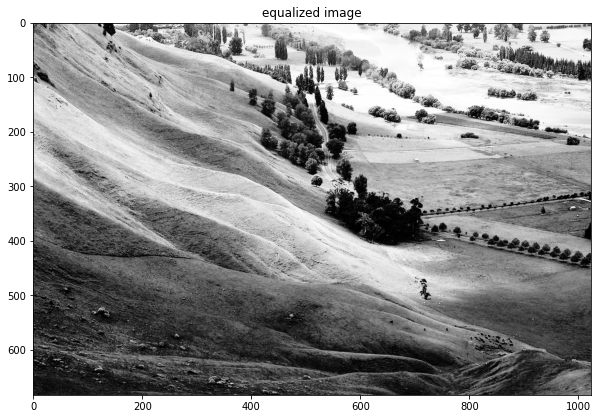

In [ ]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap='gray', vmin=0, vmax=255)
plt.title("equalized image")


Plot the equalized histogram, PDF and CDF


Text(0.5, 1.0, 'equalized histogram')

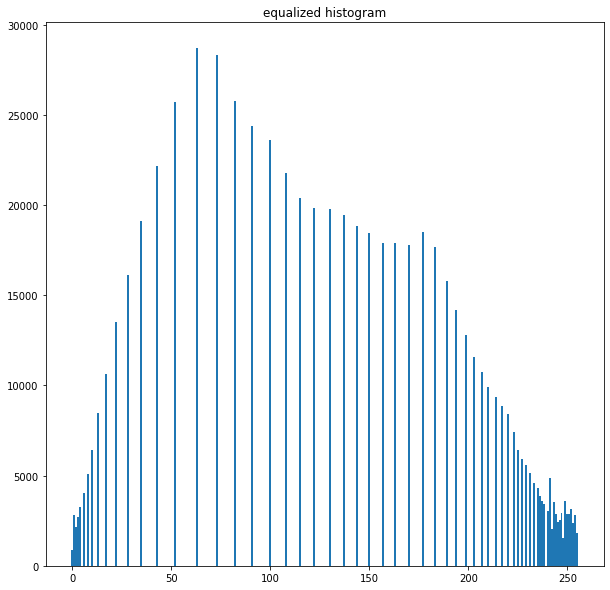

In [ ]:
bin_count,bins_edges = np.histogram(I_eq,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start,bin_count)
plt.title("equalized histogram")


Text(0.5, 1.0, 'equalized PDF and const*CDF')

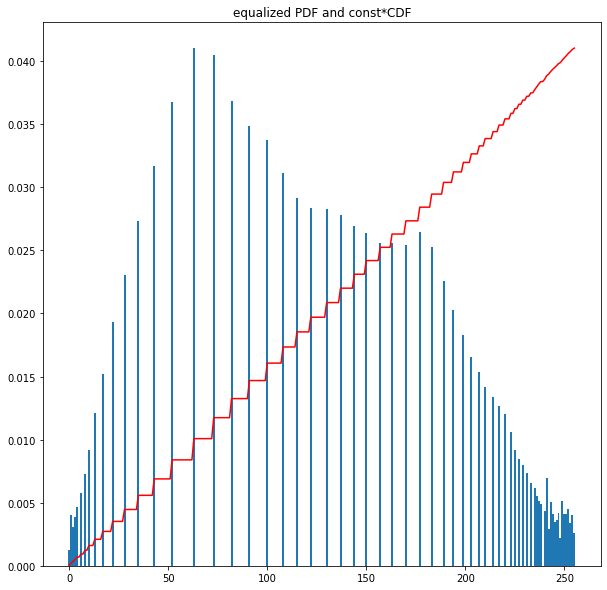

In [ ]:
pdf = bin_count/np.sum(bin_count)
cdf = np.cumsum(pdf)

fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("equalized PDF and const*CDF")


## cv2 histogram equalization function


Text(0.5, 1.0, 'cv2.equalizeHist() result')

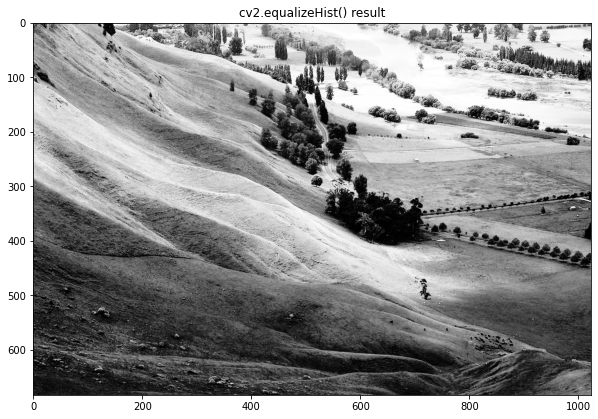

In [ ]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap='gray', vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")

